# Data Visualization (with Matplotlib and Seaborn)

The primary tool in the Python ecosystem for plotting data and creating figures is **Matplotlib**. This is a very powerful library that gives you access and control of every little thing in creating a figure. This can be good and bad and presents a somewhat steep learning curve - you often have to write many lines of code to produce a simple graphic. A more recent entrant into the PyData community is **Seaborn** (https://stanford.edu/~mwaskom/software/seaborn/examples/index.html). Seaborn is essentially a wrapper around Matplotlib and aims to provide simple access to common types of data visualizations. Also, the Matplotlib default aesthetics are a bit plain, and another thing Seaborn provides is really pretty graphics right out of the box. We're going to learn to use both of these, be sure to pay close attention to when we're using each. 

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.io import output_notebook, show

# This makes sure viz are included in the notebooks.
%matplotlib inline

In [56]:
# here we set some aesthetic parameters so that all of our figures are nice and big
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
sns.set(style="white", context="talk")

In [109]:
# Fetch some data to work with
cols = ['star_rating','title','content_rating','genre','duration','actors_list']
filepath = '../data/imdb_1000.csv'
movies = pd.read_csv(filepath, header=0, names=cols, na_filter=False)
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent']
drinks = pd.read_csv("../data/drinks.csv", header=0, names=drink_cols, na_filter=False)

In [58]:
movies.head(1)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."


In [59]:
cols = ["datetime","season","holiday","workingday","weather","temp","atemp","humidity","windspeed","casual","registered","ct"]
bikes = pd.read_csv("/home/anna/DAT-DC-10/data/bikeshare.csv", names=cols, header=0, na_filter=False)
bikes.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,ct
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16


## Histograms
A histogram presents a bar plot to visualize the relative counts of occurence of each possible category. With discrete/categorical variables, we simply count things up and create a bar plot. With continuous variables, you end up creating implicit "categories" by binning up the continuous values into discrete chunks and then counting.

In [60]:
movies.star_rating.head(10)

0    9.3
1    9.2
2    9.1
3    9.0
4    8.9
5    8.9
6    8.9
7    8.9
8    8.9
9    8.9
Name: star_rating, dtype: float64

We can get some plotting functionality for free from Pandas - Data Frames have built-in methods for calling Matplotlib. 

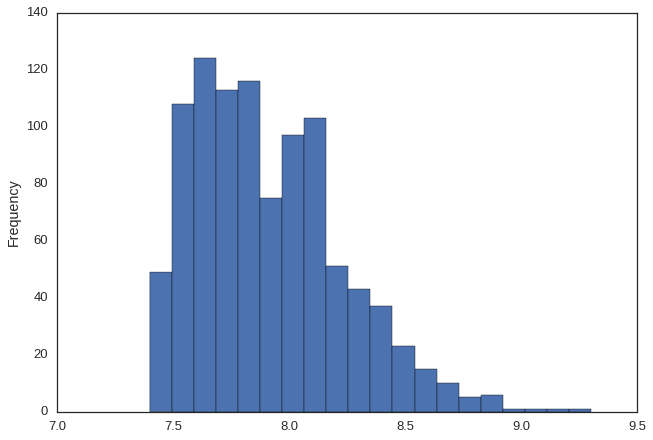

In [61]:
# PANDAS and matplotlib
# drinks.beer.plot(kind="hist",bins=15)
movies.star_rating.describe()
movies.star_rating.plot(kind="hist", bins=20)

The histogram visualizes the *distribution* of the values in the **beer** variable. Most are less than 25, but there are some data points all the way out past 350.

Notice that this Matplotlib functionality is built into Data Frames - so it doesn't *appear* that we're calling any external functions. But just to be clear, here's how you would accomplish the same thing more directly using functions from Matplotlib.

(array([  49.,  108.,  124.,  113.,  116.,   75.,   97.,  103.,   51.,
          43.,   37.,   23.,   15.,   10.,    5.,    6.,    1.,    1.,
           1.,    1.]),
 array([ 7.4  ,  7.495,  7.59 ,  7.685,  7.78 ,  7.875,  7.97 ,  8.065,
         8.16 ,  8.255,  8.35 ,  8.445,  8.54 ,  8.635,  8.73 ,  8.825,
         8.92 ,  9.015,  9.11 ,  9.205,  9.3  ]),
 <a list of 20 Patch objects>)

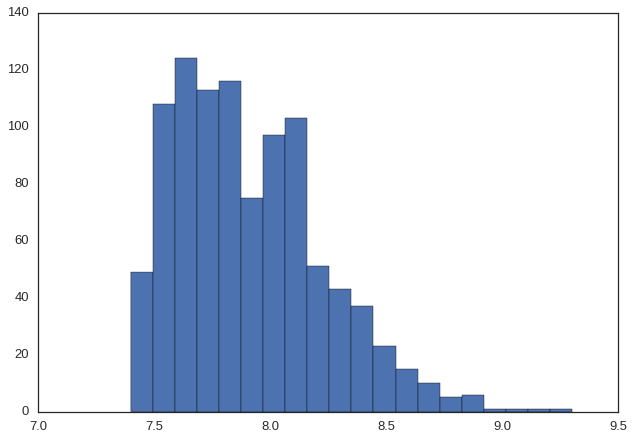

In [62]:
# Calling Matplotlib directly
# plt.hist(drinks.beer,15)
plt.hist(movies.star_rating, 20)

(array([  1.86000000e+03,   8.07000000e+02,   5.60000000e+02,
          5.71000000e+02,   4.86000000e+02,   5.02000000e+02,
          4.86000000e+02,   4.78000000e+02,   4.32000000e+02,
          4.39000000e+02,   3.91000000e+02,   3.98000000e+02,
          2.82000000e+02,   3.28000000e+02,   2.87000000e+02,
          2.50000000e+02,   2.26000000e+02,   1.96000000e+02,
          2.03000000e+02,   1.92000000e+02,   1.49000000e+02,
          1.42000000e+02,   1.12000000e+02,   1.29000000e+02,
          1.01000000e+02,   1.21000000e+02,   8.60000000e+01,
          6.50000000e+01,   8.30000000e+01,   7.10000000e+01,
          5.40000000e+01,   4.10000000e+01,   5.10000000e+01,
          3.80000000e+01,   4.90000000e+01,   2.70000000e+01,
          2.90000000e+01,   2.30000000e+01,   2.10000000e+01,
          1.60000000e+01,   1.90000000e+01,   1.80000000e+01,
          2.00000000e+01,   1.60000000e+01,   1.20000000e+01,
          1.00000000e+01,   3.00000000e+00,   1.00000000e+00,
        

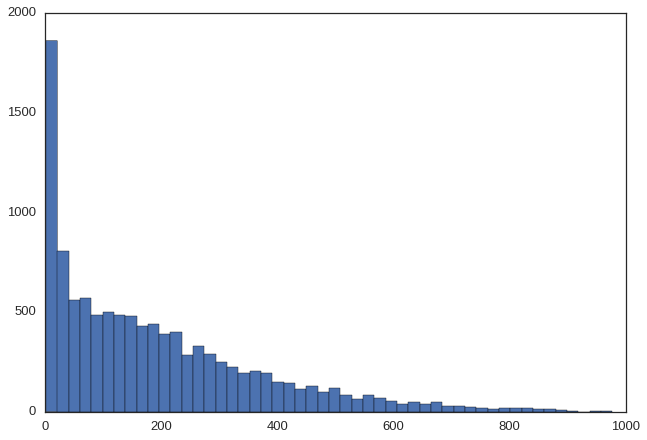

In [63]:
plt.hist(bikes.ct, 50)
#bikes.ct.describe()

We can also do this with Seaborn just as easily.

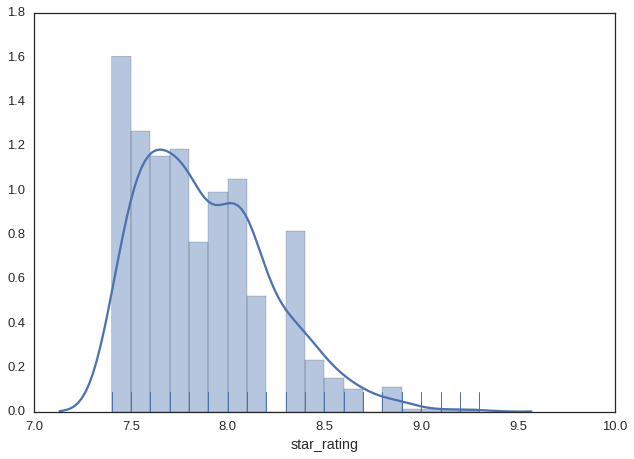

In [64]:
# Seaborn (rug plot is individual data points), kde (kernel distributon estimation)
#sns.distplot(drinks.beer,  rug=True)
sns.distplot(movies.star_rating, rug=True)
#movies.columns

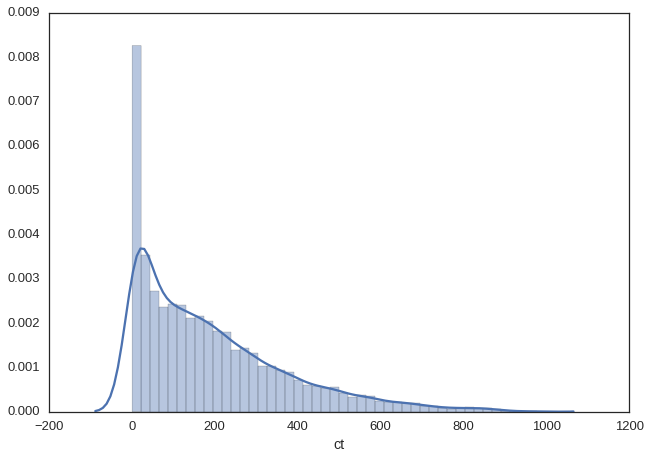

In [65]:
sns.distplot(bikes.ct, rug=False)

Seaborn throws in a *rugplot* and a *kernel density estimate* on top of the histogram. These can all be added or removed with the right arguments.

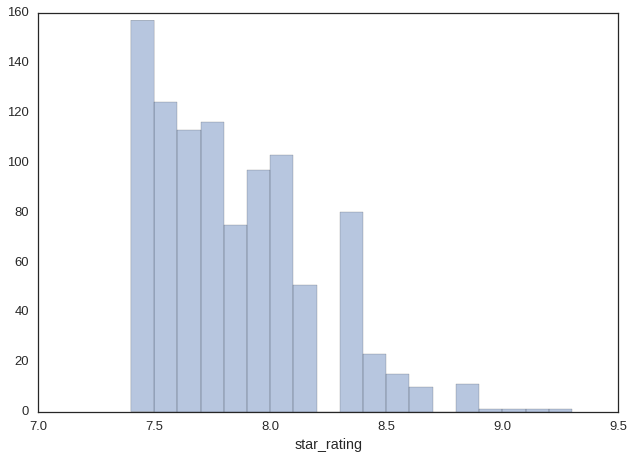

In [66]:
#sns.distplot(drinks.beer, rug=False, kde=False)
sns.distplot(movies.star_rating, rug=False, kde=False)

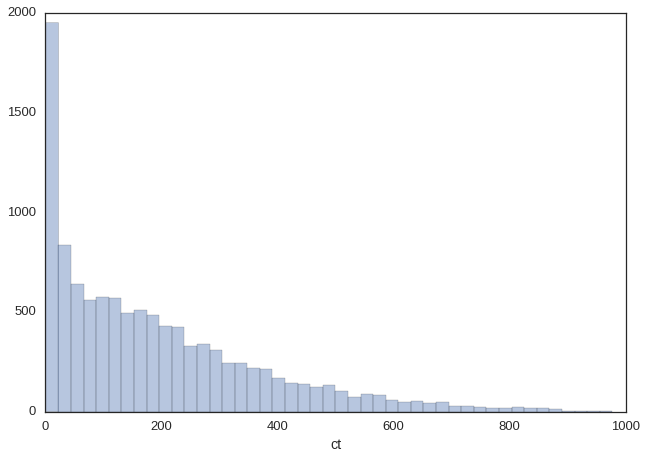

In [67]:
sns.distplot(bikes.ct, rug=False, kde=False)

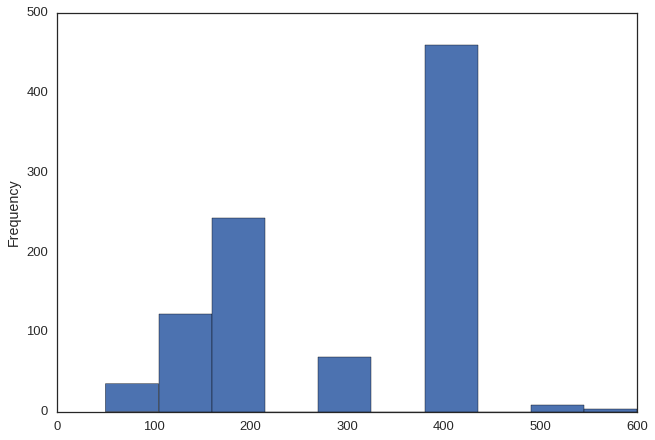

In [74]:
movies.cont.plot(kind="hist", bins=10)

In [ ]:
bikes.ct.plot(kind="hist", bins=50)

## Scatterplot
We often want to visualize a *bivariate* distribution - how are two variables related to one another? 

In [83]:
#drinks[["beer","wine"]].head()
movies.columns
movies.head(2)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"


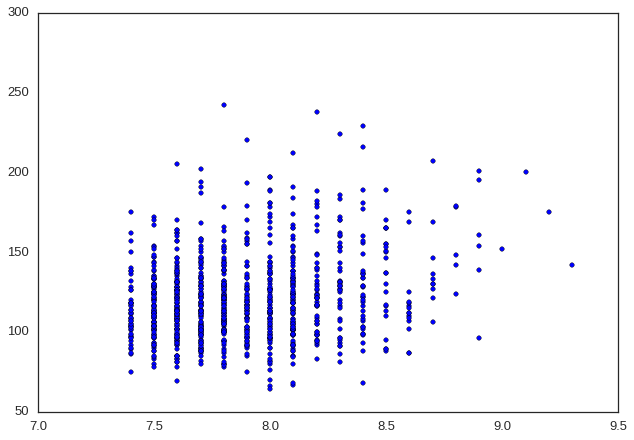

In [84]:
#plt.scatter(x=drinks.beer, y= drinks.wine)
plt.scatter(x=movies.star_rating, y=movies.duration)

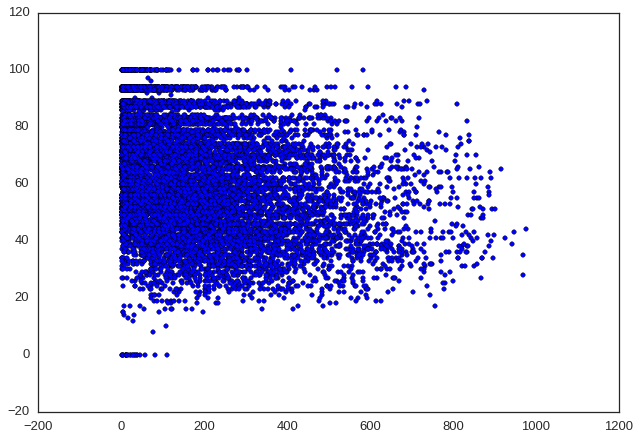

In [85]:
plt.scatter(x=bikes.ct, y=bikes.humidity)

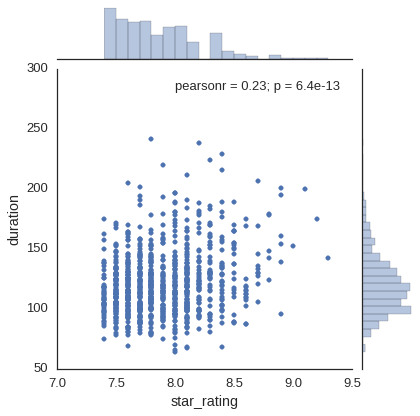

In [86]:
#sns.jointplot("beer","wine",data=drinks)
sns.jointplot("star_rating", "duration", data=movies)

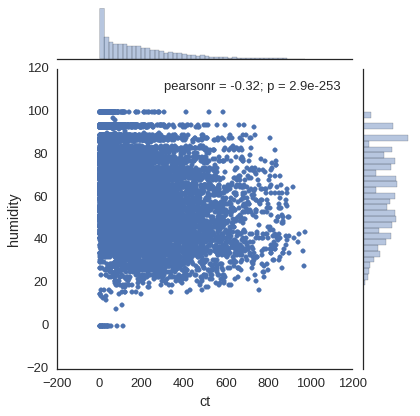

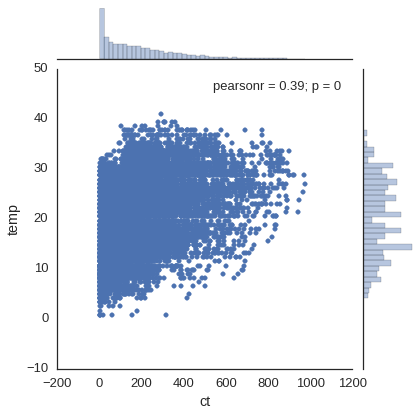

In [87]:
sns.jointplot("ct", "humidity", data=bikes)
sns.jointplot("ct", "temp", data=bikes)

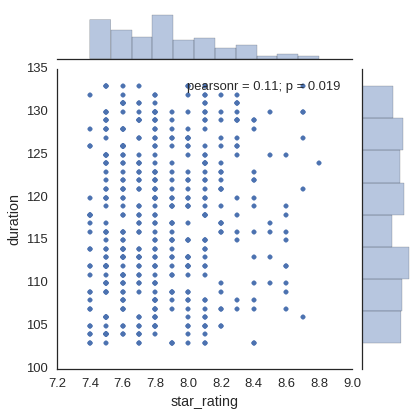

In [88]:
movies.duration.describe()
sns.jointplot("star_rating","duration", data=movies[(movies.star_rating > 7.2) & (movies.duration > 102) & (movies.duration < 134)] )

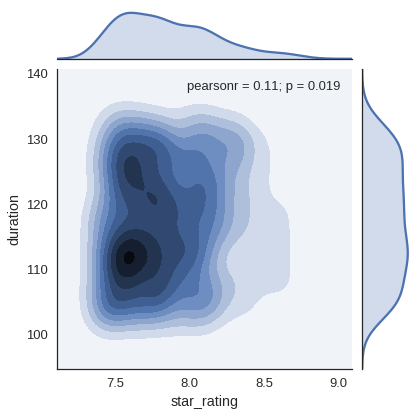

In [89]:
sns.jointplot("star_rating","duration", data=movies[(movies.star_rating > 7.2) & (movies.duration > 102) & (movies.duration < 134)], kind= "kde")

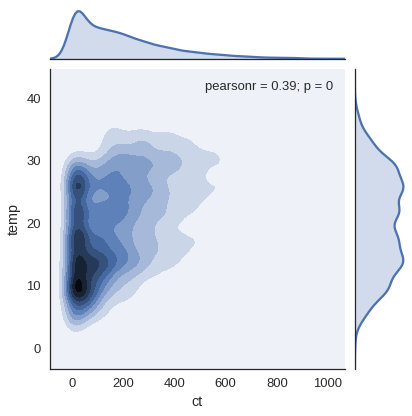

In [90]:
sns.jointplot("ct", "temp", data=bikes, kind="kde")

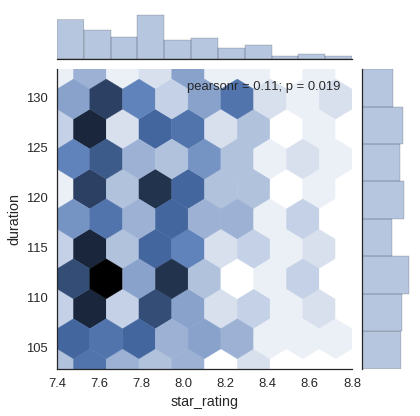

In [91]:
#sns.jointplot("beer","wine", data=drinks[(drinks.beer < 100) & (drinks.wine < 30)] , kind = "hex")
sns.jointplot("star_rating","duration", data=movies[(movies.star_rating > 7.2) & (movies.duration > 102) & (movies.duration < 134)], kind= "hex")

Make sure you label your axes. 

ValueError: First argument must be a sequence

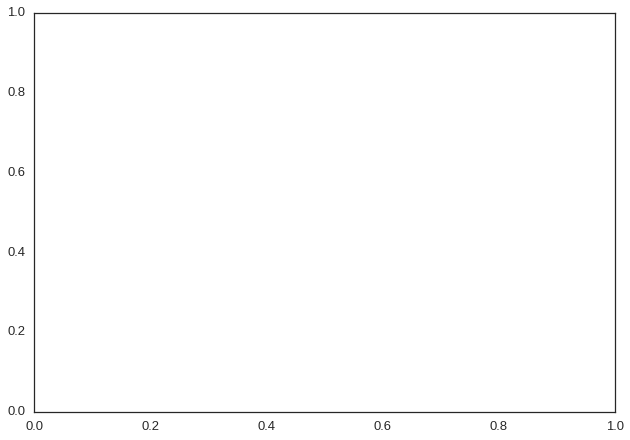

In [92]:
plt.scatter("beer","wine", data=drinks[(drinks.beer < 100) & (drinks.wine < 30)] )
plt.ylabel("Wine (Number of Bottles)")
plt.xlabel("Beer (Number of Bottles)")
plt.title("Wine vs Beer")

## Scatterplot Matrix
Let's look at every bivariate visualization at once

In [100]:
# pd.scatter_matrix(drinks[['beer', 'spirit', 'liters']])
movies.head(3)
#movies['act'] = movies['actors_list'].map(lambda x: len(x.split(',')))
#movies.head(3)
#movies.content_rating.value_counts()
#movies['content_num'] = movies['content_rating'].map(lambda x: x[0:1])
#movies.head(10)
def f(x):
    if x == "G" or x == "GP":
        return 50.0
    elif x == "PG" or x == "GP":
        return 150.0
    elif x == "PG-13" or x == "APPROVED" or x == "PASSED":
        return 200.0
    elif x == "NOT RATED" or x == "":
        return 300.0
    elif x == "R":
        return 400.0
    elif x == "NC-17" or x == "TV-MA":
        return 500.0
    elif x == "X":
        return 600.0

movies['cont'] = movies["content_rating"].map(f)
movies.head(2)

,star_rating,title,content_rating,genre,duration,actors_list,cont
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",400
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",400


In [110]:
#sns.pairplot(movies[["star_rating","duration","cont"]])
drinks.beer.describe()
drinks.head(1)
#movies.cont.describe()
#movies.duration.describe()

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0,AS


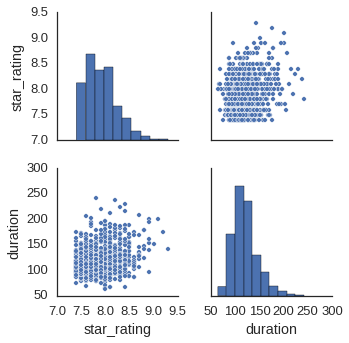

In [112]:
sns.pairplot(movies[["star_rating","duration"]])
# sns.pairplot(movies[["star_rating","duration"]])

# I'm not sure why when I put in "cont" as the third parameter it doesn't display?  
# Question: it is a categorical attribute vs continuous?

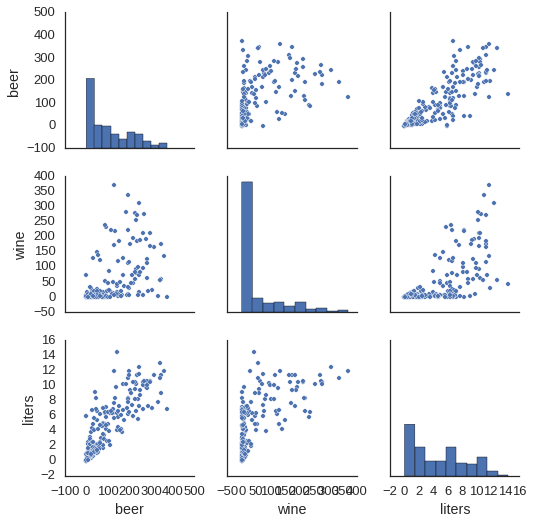

In [113]:
sns.pairplot(drinks[["beer","wine","liters"]])

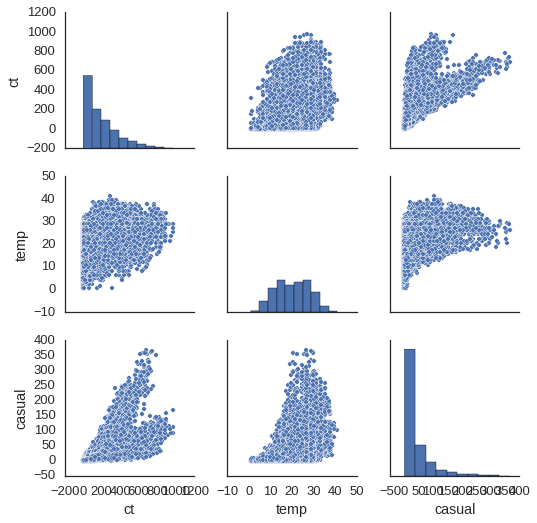

In [106]:
sns.pairplot(bikes[["ct","temp","casual"]])
# Question:  
# why aren't the temp vs temp etc x=y lines?

In [70]:
myGraphic = sns.PairGrid(drinks[["beer","wine","liters"]], diag_sharey=False)
myGraphic.map_lower(sns.kdeplot, cmap="Blues")
myGraphic.map_upper(plt.scatter)
myGraphic.map_diag(sns.kdeplot, lw=3)

NameError: name 'drinks' is not defined

In [ ]:
myGraphic = sns.PairGrid(bikes[["temp","ct","casual"]], diag_sharey=False)
myGraphic.map_lower(sns.kdeplot, cmap="Blues")
myGraphic.map_upper(plt.scatter)
myGraphic.map_diag(sns.kdeplot, lw=3)
# Question:

## Barplot
Visualize counts across discrete variables

In [ ]:
drinks.continent.value_counts()

This Pandas "Series" has a nice plot method

In [ ]:
drinks.continent.value_counts().plot(kind="bar")

In [ ]:
bikes.season.value_counts().plot(kind="bar")
bikes.season.value_counts()

In [ ]:
bikes.groupby('season').mean()

In [ ]:
# calculate the mean alcohol amounts for each continent
drinks.groupby('continent').mean()

Pandas groupBy() has some useful behavior with plots 

In [ ]:
# side-by-side bar plots
drinks.groupby('continent').mean().plot(kind='bar')
# Question:  Can you groupby ranges ? Or do I need to add in another column based on range

In [ ]:
# Question:  Can you groupby ranges ? Or do I need to add in another column based on range
# How do I increase the x=axis?
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 8
sns.set(style="white", context="talk")
bikes.groupby('season').mean().plot(kind='bar')


In [ ]:
drinks.groupby('continent').mean().plot(kind='bar',stacked=True)

In [ ]:
bikes.groupby('season').mean().plot(kind='bar',stacked=True)

## BoxPlot
Another useful way of visualizing the distribution of a variable. A box plot shows the quantiles of a distribution.

In [81]:
drinks.beer.describe()

AttributeError: 'DataFrame' object has no attribute 'beer'

In [ ]:
drinks[["beer","wine","spirit"]].plot(kind="box")

In [ ]:
bikes.casual.describe()

In [ ]:
bikes[["registered","ct","casual"]].plot(kind="box")

In [ ]:
sns.boxplot(drinks[["beer","wine","spirit"]])

In [ ]:
sns.boxplot(bikes[["casual","ct","registered"]])

In [ ]:
sns.boxplot(x="continent",y="beer",data=drinks)

In [ ]:
sns.boxplot(x="continent",y="beer",data=drinks)
sns.stripplot(x="continent",y="beer",data=drinks,jitter=True)

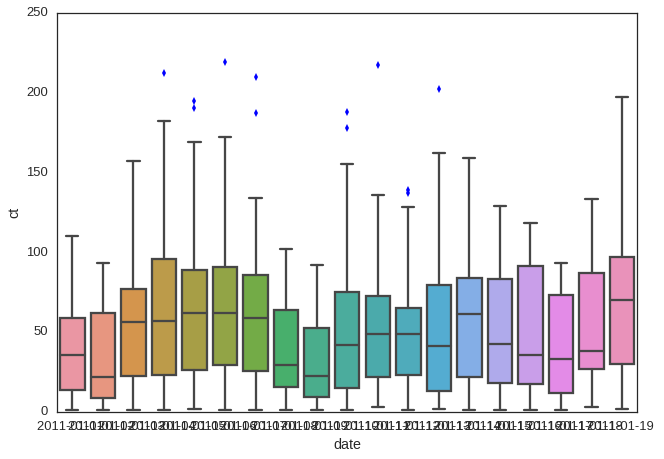

In [80]:
bikes["date"] = bikes["datetime"].map(lambda(x): x[0:11])
# Question:  How to optimize?
# How to change font-size? or tilt x-axis labels?
#bikes.head(2)
#bikes.groupby('date').describe()
#bikes.groupby('date').mean()
#bikes.groupby('date')
month_bk = bikes[(bikes.date <= "2011-01-30")]
month_bk.shape
sns.boxplot(x="date",y="ct",data=month_bk)


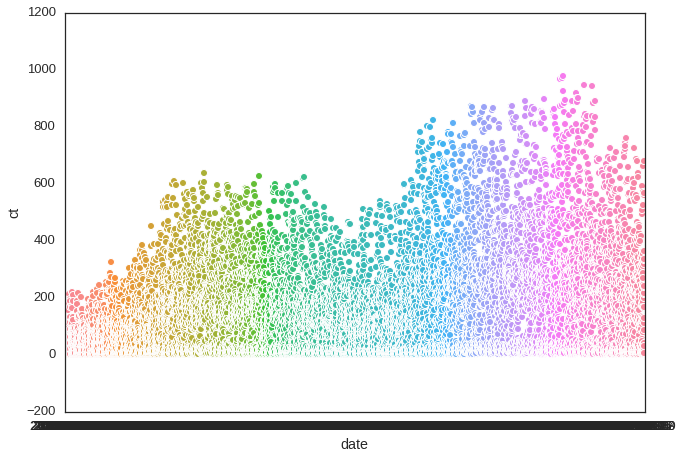

In [114]:
# Question:  ?
sns.stripplot(x="date",y="ct",data=bikes,jitter=True)


## LinePlot
Visualize some variable relative to a fixed ordering. For example, plotting a time series - the value of some variable at each time point.

In [ ]:
# Load in the UFO data set
url = '../data/ufo.csv'
ufo = pd.read_csv(url)
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo['Year'] = ufo.Time.dt.year

# counts occurences per year
ufo.Year.value_counts().sort_index().head(10)

In [ ]:
ufo.Year.value_counts().sort_index().plot()
plt.ylabel("UFO Sightings")
plt.xlabel("Year")

## Grids
Often helpful to look at many variables simultaneously while separating the data into different segments (like a visual groupby).

In [ ]:
drinks.boxplot(by='continent')

In [ ]:
# histogram of beer servings grouped by continent
drinks.hist(column='beer', by='continent')

In [ ]:
sns.factorplot(x="beer",col="continent",data=drinks,kind="violin")


Many complicated grids are possible (https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.factorplot.html)

## Saving

In [ ]:
sns.factorplot(x="beer",col="continent",data=drinks,kind="violin")
plt.savefig('../../../../beer_histogram.png')

### Bokeh
The newest kid on the block is Bokeh (http://bokeh.pydata.org/), a python library that is a wrapper for some HTML/javascript plotting tools. This way, we can use simple Python commands to utilize the power of web technologies to have immersive, interactive data visualizations.